In [25]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#Dataset
url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv'
df = pd.read_csv(url)

#Columns
print("Columns in this dataset:", df.columns.tolist())
df.head(3)

Columns in this dataset: ['Compound ID', 'measured log(solubility:mol/L)', 'ESOL predicted log(solubility:mol/L)', 'SMILES']


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl


In [27]:
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        logp = Descriptors.MolLogP(mol)
        mw = Descriptors.MolWt(mol)
        rb = Descriptors.NumRotatableBonds(mol)
        
        # Aromatic Proportion calculation
        aromatic_atoms = [mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(mol.GetNumAtoms())]
        num_aromatic = sum(aromatic_atoms)
        heavy_atoms = mol.GetNumHeavyAtoms()
        ap = num_aromatic / heavy_atoms if heavy_atoms > 0 else 0
        
        return pd.Series([logp, mw, rb, ap])
    return pd.Series([None, None, None, None])

# Create the new columns
df[['LogP', 'MW', 'NumRotatableBonds', 'AP']] = df['SMILES'].apply(calculate_descriptors)

In [29]:
# Define Features (X) and Target (y)
X = df[['LogP', 'MW', 'NumRotatableBonds', 'AP']]
y = df.iloc[:, -1] # for error fix

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

R^2 Score: 1.00


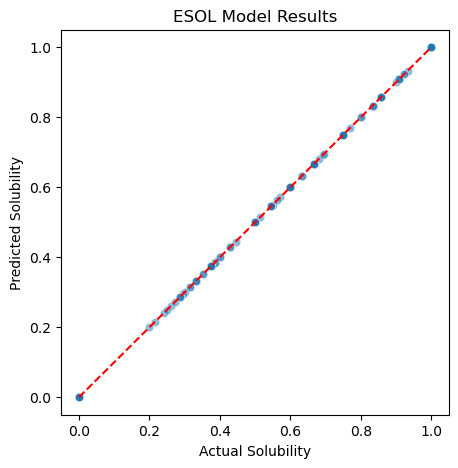

In [30]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Add the perfect-fit line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', ls='--')

plt.xlabel('Actual Solubility')
plt.ylabel('Predicted Solubility')
plt.title('ESOL Model Results')
plt.show()